# In this code I assign zeros to the mask array

In [ ]:
# Importing libraries
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np

$$\textbf{We used several data products from the Planck 2018
data release.}$$ $$\textbf{We used the Planck SMICA component
separation maps, both full mission and half mission
(HM) maps2 in our analyses.}$$
$$\textbf{I  download the COM_CMB_IQU-smica_2048_R3.00_hm2 CMB map (https://pla.esac.esa.int/).}$$

$$\textbf{The Planck maps we used in the
paper were originally created at HEALPix (Gorski et al.
2005) resolution NSIDE = 2048}$$ $$\textbf{ at an approximate angular resolution of 50
full width half maximum (FWHM).}$$

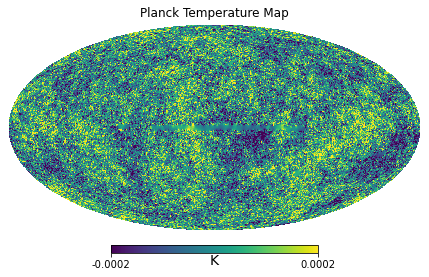

In [2]:
planck_IQU_SMICA=hp.read_map('/home/augusto/Descargas/COM_CMB_IQU-smica_2048_R3.00_hm2.fits')
fig=plt.figure(1)
hp.mollview(planck_IQU_SMICA, min=-0.0002,max=0.0002,
title='Planck Temperature Map',fig=1,unit='K')

$2. \textbf{. For the full-sky analysis, we used the 2018 vesion of the Planck common masks3
for temperature}$$ 
\textbf{ and Q/U polarization. These masks were originally generated at NSIDE=2048.}$

$a.\textbf{We downloaded the COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits}$$ \textbf{ -- Temperature confidence mask with fsky = 77.9%.}$

In [3]:
# Read the map
mask=hp.read_map('/home/augusto/cmblss/data/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits')

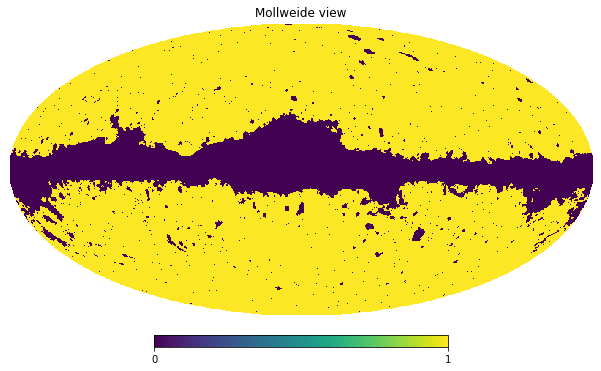

In [4]:
# Visualization the mask with hp.mollview
hp.mollview(mask)

In [6]:
# Size of the mask
mask.shape

(50331648,)

In [7]:
mask[1]

1.0

In [8]:
mask

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

$b. \textbf{In this part I assigned 0 to some regions (component) of the mask array}$

In [29]:
#  I assign zeros to the quarter part of the mask
for i in np.arange(37748736, 50331648,1):
    mask[i]=0


In [30]:
mask

array([0., 0., 1., ..., 0., 0., 0.], dtype=float32)

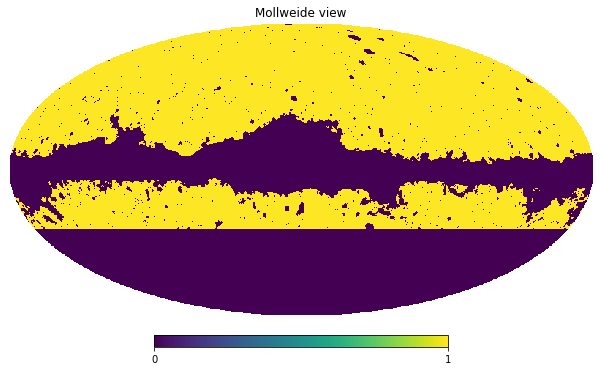

In [31]:
# Visualization the mask with hp.mollview
hp.mollview(mask)

In [32]:
# Percentage of the areas 
n = 50331648/4 # number of added pixels with 0

In [33]:
nt=len(mask)
nt

50331648

In [35]:
# Percentage of covered sky
# 22.1 percentage initial covered sky by mask
p=(n/nt)*100 + 22.1     
p

47.1

$3. \textbf{. New masked}$


In [60]:
mask2=mask

In [62]:
# Number of pixeles
NPIX = hp.nside2npix(2048)
print(NPIX)

50331648


In [67]:
# The first coordinate is colalitude, and the second is longitud
# ang2vec : convert angles to 3D position vector
vec = hp.ang2vec(np.pi / 6, np.pi * 1/ 6) 
print(vec)

[0.4330127 0.25      0.8660254]


In [68]:
# I assing zeros to the another region to the mask
ipix_disc = hp.query_disc(nside=2048, vec=vec, radius=np.radians(30))

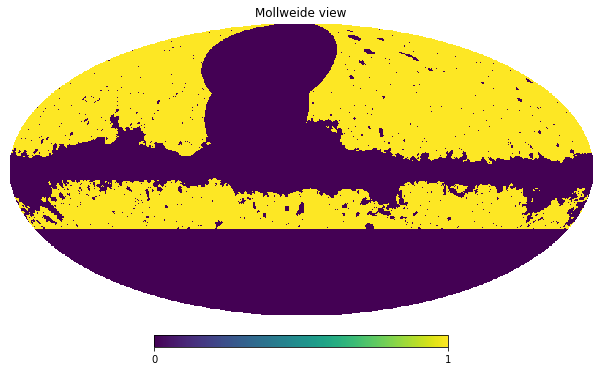

In [69]:
mask2[ipix_disc]=0
hp.mollview(mask2)

In [86]:
# how many zeros there are in the mask
i = 0 # count
for d in np.arange(0,50331648,1):
    if (mask2[d]==0):
        i= i+1
        
i

27641379

In [87]:
# Percentage of the areas 
n1= 27641379
nt = len(mask2)
n1/nt

0.5491848587989807

$\textbf{New mask}$

In [90]:
# Read the mask
mask3=hp.read_map('/home/augusto/cmblss/data/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits')


In [91]:
# The first coordinate is colalitude, and the second is longitud
# ang2vec : convert angles to 3D position vector
vec = hp.ang2vec(np.pi / 6,- np.pi * 1/ 5) 
print(vec)

[ 0.4045085  -0.29389263  0.8660254 ]


In [92]:
# I assing zeros to the another region to the mask
ipix_disc = hp.query_disc(nside=2048, vec=vec, radius=np.radians(40))
mask3[ipix_disc]=0


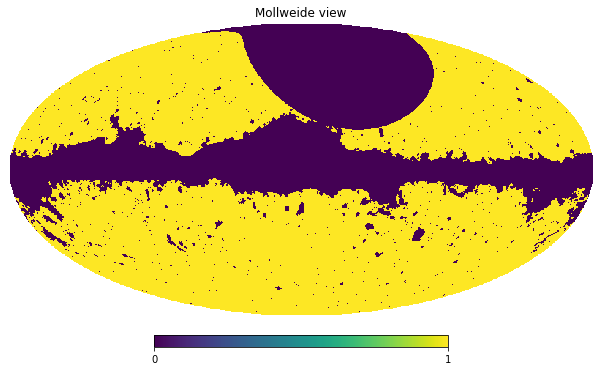

In [93]:
hp.mollview(mask3)

In [94]:
# Number of zeros
# how many zeros there are in the mask
i = 0 # count
for d in np.arange(0,50331648,1):
    if (mask3[d]==0):
        i= i+1
        
i


16823496

In [96]:
# Percentage of the areas 
n2 =  16823496
nt = len(mask3)
n2/nt

0.33425283432006836

$ \textbf{Mask n° 4}$

In [109]:
# Initial mask.
mask4=mask2

In [115]:
# The first coordinate is colalitude, and the second is longitud.
# ang2vec : convert angles to 3D position vector.
vec1 = hp.ang2vec(np.pi / 4,- np.pi * 1/2) 
print(vec)

[ 0.4045085  -0.29389263  0.8660254 ]


In [118]:
# I assing zeros to the another region to the mask.
# ipix_disc is a flag.
ipix_disc = hp.query_disc(nside=2048, vec=vec, radius=np.radians(50))
mask4[ipix_disc]=0

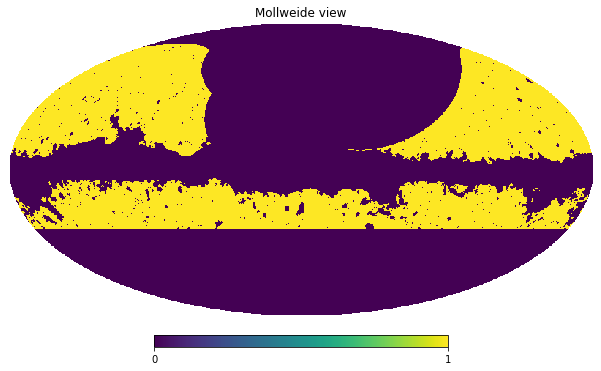

In [119]:
# Visualization the mask
hp.mollview(mask4)

In [122]:
# Number of zeros.
# how many zeros there are in the mask.
# i is a flah.
i = 0 # count.
for d in np.arange(0,50331648,1):
    if (mask4[d]==0):
        i= i+1
        
i


33067333

In [123]:
# Percentage of the areas. 
n4 =  33067333
nt = len(mask4)
n4/nt

0.6569888790448507

$ \textbf{Original mask} $

In [135]:
mask5=hp.read_map('/home/augusto/cmblss/data/COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits')

$c. \textbf{ I compute the pseudo $D_{ls}$ of this mask with namaster library python}$

In [36]:
#import pymaster
import pymaster as nmt

In [37]:
# HEALPix resolution parameter used here
nside = 2048

In [38]:
# An NmtField object contains all the information describing the fields to correlate, including their observed maps, masks and contaminant templates.
f_0=nmt.NmtField(mask, [planck_IQU_SMICA])

In [39]:
# Initialize binning scheme with 4 ells per bandpower
# Convenience constructor for HEALPix maps with linear binning.
b = nmt.NmtBin.from_nside_linear(nside, 4)

In [40]:
# Compute MASTER estimator
# spin-0 x spin-0
#Computes the full MASTER estimate of the power spectrum of two fields (f1 and f2). 
cl_00 = nmt.compute_full_master(f_0, f_0, b)

In [41]:
# Shape of the pseudo Cls
cl_00.shape
cl_00[0]


array([2.06339397e-10, 7.71793584e-11, 2.58077465e-11, ...,
       1.56360572e-18, 1.77660167e-18, 2.03935690e-18])

In [42]:
#Returns an array with the effective multipole associated to each bandpower. 
#These are computed as a weighted average of the multipoles within each bandpower.
el = b.get_effective_ells()
el.shape
el


array([3.5000e+00, 7.5000e+00, 1.1500e+01, ..., 6.1315e+03, 6.1355e+03,
       6.1395e+03])

(0.0, 2500.0)

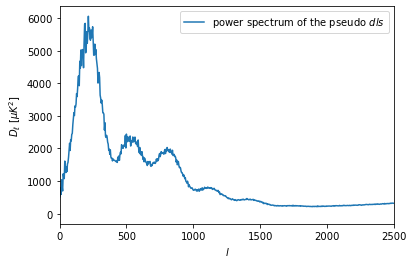

In [43]:
#plot results
dl=cl_00[0]*[(1e6)**(2)]*el*(el+1)/2/np.pi
plt.plot(el,dl, label='power spectrum of the pseudo $dls$')
plt.legend()
plt.xlabel(r'$l$')
plt.ylabel('$D_\ell~[\mu K^2]$')
plt.xlim(0,2500)

$d.\textbf{I compute the correlation function of this $D_{ls}$ with camb correlation function (Lewis et al. 2022)}$

In [46]:
from scipy.interpolate import interp1d

In [49]:
# Interpolation of the pseudo Dls
# I define the interpolation with x**3
f=interp1d(el, dl, kind='cubic') 

In [50]:
# I define my news l
lnew=np.linspace(4, 2500, 2498)
# oncatenate

#pdl is the interpolation of the pseudo Dls
pdl_int=f(lnew)
lnew.shape

(2498,)

In [51]:
# Concatenate the ls
ljoin=np.concatenate((([0,0,2,3]),lnew))
# Concatenate the pseudo Dls
pDl_=np.concatenate((([0.0,0.0,203.36331868506028,918.9783866182479]),pdl_int ))

In [52]:
# Make an array to input in the camb correlation function
Dl=np.ones((len(pDl_),4))
Dl[:,0]=pDl_
Dl.shape

(2502, 4)

In [54]:
# Import correlations
from camb import correlations

In [83]:
corr_, xvals_, weights = correlations.gauss_legendre_correlation(Dl) 
xvals_=np.linspace(-1,1,2502)
r_=np.arccos(xvals_)*180/np.pi # sampled theta values in degrees

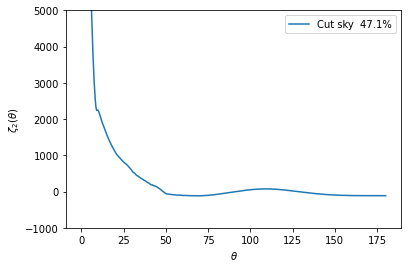

In [88]:
# Plol the results
plt.plot(r_, corr_[:,0], label = 'Cut sky  47.1%')
plt.ylabel(r'$\zeta_{2}(\theta)$')
plt.xlabel(r'$\theta$')
plt.ylim(-1000,5000)
plt.legend(loc='best')

$e.\textbf{I compute the correlation function of this $D_{ls}$ with camb correlation function (Lewis et al. 2022)}$

In [70]:
# An NmtField object contains all the information describing the fields to correlate, including their observed maps, masks and contaminant templates.
f_1=nmt.NmtField(mask2, [planck_IQU_SMICA])

In [71]:
# Initialize binning scheme with 4 ells per bandpower
# Convenience constructor for HEALPix maps with linear binning.
b1 = nmt.NmtBin.from_nside_linear(nside, 4)

In [72]:
# Compute MASTER estimator
# spin-0 x spin-0
#Computes the full MASTER estimate of the power spectrum of two fields (f1 and f2). 
cl_10 = nmt.compute_full_master(f_1, f_1, b1)

In [73]:
# Shape of the pseudo Cls
cl_10.shape



(1, 1535)

In [74]:
#Returns an array with the effective multipole associated to each bandpower. 
#These are computed as a weighted average of the multipoles within each bandpower.
el_1 = b1.get_effective_ells()
el_1.shape


(1535,)

(0.0, 2500.0)

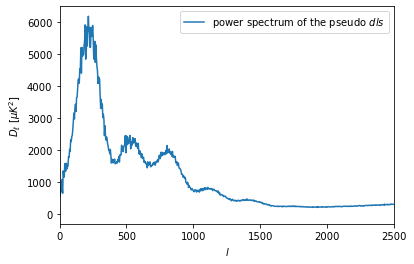

In [75]:
#plot results
dl_1=cl_10[0]*[(1e6)**(2)]*el_1*(el_1+1)/2/np.pi
plt.plot(el_1,dl_1, label='power spectrum of the pseudo $dls$')
plt.legend()
plt.xlabel(r'$l$')
plt.ylabel('$D_\ell~[\mu K^2]$')
plt.xlim(0,2500)

In [76]:
from scipy.interpolate import interp1d

In [77]:
# Interpolation of the pseudo Dls
# I define the interpolation with x**3
f_1=interp1d(el_1, dl_1, kind='cubic') 

In [78]:
# I define my news l
lnew_1=np.linspace(4, 2500, 2498)
# oncatenate

#pdl is the interpolation of the pseudo Dls
pdl_int1=f_1(lnew_1)
lnew_1.shape

(2498,)

In [79]:
# Concatenate the ls
ljoin_1=np.concatenate((([0,0,2,3]),lnew_1))
# Concatenate the pseudo Dls
pDl_1=np.concatenate((([0.0,0.0,203.36331868506028,918.9783866182479]),pd# Plol the results
plt.plot(r_1, corr_1[:,0], label = 'Cut sky with 45.1%')
plt.ylabel(r'$\zeta_{2}(\theta)$')
plt.xlabel(r'$\theta$')
plt.ylim(-1000,5000)
plt.legend(loc='best')l_int1 ))

In [80]:
# Make an array to input in the camb correlation function
Dl1=np.ones((len(pDl_1),4))
Dl1[:,0]=pDl_1
Dl1.shape

(2502, 4)

In [81]:
corr_1, xvals_1, weights = correlations.gauss_legendre_correlation(Dl1) 
xvals_1=np.linspace(-1,1,2502)
r_1=np.arccos(xvals_1)*180/np.pi # sampled theta values in degrees

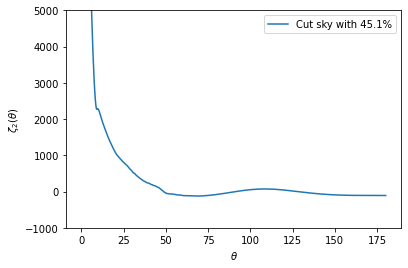

In [89]:
# Plol the results
plt.plot(r_1, corr_1[:,0], label = 'Cut sky with 45.1%')
plt.ylabel(r'$\zeta_{2}(\theta)$')
plt.xlabel(r'$\theta$')
plt.ylim(-1000,5000)
plt.legend(loc='best')

$ \textbf{$\zeta(\theta)$ to the map with mask with cut sky with 33.4%}$

In [97]:
# An NmtField object contains all the information describing the fields to correlate, including their observed maps, masks and contaminant templates.
f_2=nmt.NmtField(mask3, [planck_IQU_SMICA])

In [98]:
# Initialize binning scheme with 4 ells per bandpower
# Convenience constructor for HEALPix maps with linear binning.
b2 = nmt.NmtBin.from_nside_linear(nside, 4)

In [99]:
# Compute MASTER estimator
# spin-0 x spin-0
#Computes the full MASTER estimate of the power spectrum of two fields (f1 and f2). 
cl_20 = nmt.compute_full_master(f_2, f_2, b2)

In [100]:
#Returns an array with the effective multipole associated to each bandpower. 
#These are computed as a weighted average of the multipoles within each bandpower.
el_2 = b2.get_effective_ells()
el_2.shape

(1535,)

(0.0, 2500.0)

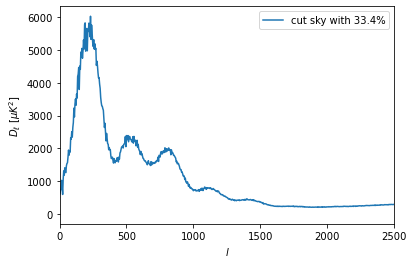

In [102]:

# The  pseudo Dls
dl_2=cl_20[0]*[(1e6)**(2)]*el_2*(el_2+1)/2/np.pi
# Plotting the results
plt.plot(el_2,dl_2, label='cut sky with 33.4%')
plt.legend()
plt.xlabel(r'$l$')
plt.ylabel('$D_\ell~[\mu K^2]$')
plt.xlim(0,2500)

In [103]:
# Interpolation of the pseudo Dls
# I define the interpolation with x**3
f_2=interp1d(el_2, dl_2, kind='cubic') 

In [104]:
# I define my news l
lnew_2=np.linspace(4, 2500, 2498)
# oncatenate

#pdl is the interpolation of the pseudo Dls
pdl_int2=f_2(lnew_2)
lnew_2.shape

(2498,)

In [105]:
# Concatenate the ls
ljoin_2=np.concatenate((([0,0,2,3]),lnew_2))
# Concatenate the  interpolated pseudo Dls
pDl_2=np.concatenate((([0.0,0.0,203.36331868506028,918.9783866182479]),pdl_int2))

In [106]:
# Make an array to input in the camb correlation function
Dl2=np.ones((len(pDl_2),4))
Dl2[:,0]=pDl_2
Dl2.shape

(2502, 4)

In [107]:
corr_2, xvals_2, weights = correlations.gauss_legendre_correlation(Dl1) 
xvals_2=np.linspace(-1,1,2502)
r_2=np.arccos(xvals_2)*180/np.pi # sampled theta values in degrees

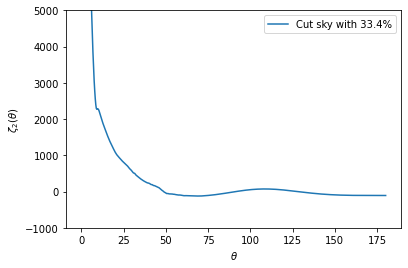

In [108]:
# Plol the results
plt.plot(r_2, corr_2[:,0], label = 'Cut sky with 33.4%')
plt.ylabel(r'$\zeta_{2}(\theta)$')
plt.xlabel(r'$\theta$')
plt.ylim(-1000,5000)
plt.legend(loc='best')

$ \textbf{$\zeta(\theta)$ to the map with mask with cut sky with 65.7%}$

In [124]:
# An NmtField object contains all the information describing the fields to correlate, including their observed maps, masks and contaminant templates.
f_3=nmt.NmtField(mask4, [planck_IQU_SMICA])

In [125]:
# Initialize binning scheme with 4 ells per bandpower
# Convenience constructor for HEALPix maps with linear binning.
b3 = nmt.NmtBin.from_nside_linear(nside, 4)

In [126]:
# Compute MASTER estimator
# spin-0 x spin-0
#Computes the full MASTER estimate of the power spectrum of two fields (f1 and f2). 
cl_30 = nmt.compute_full_master(f_3, f_3, b3)

In [127]:
#Returns an array with the effective multipole associated to each bandpower. 
#These are computed as a weighted average of the multipoles within each bandpower.
el_3 = b3.get_effective_ells()

(0.0, 2500.0)

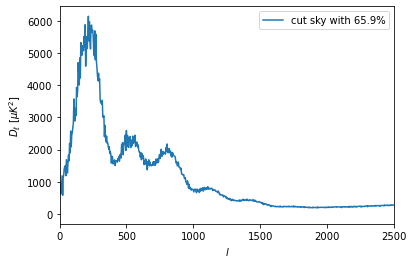

In [128]:
# The  pseudo Dls
dl_3=cl_30[0]*[(1e6)**(2)]*el_3*(el_3+1)/2/np.pi
# Plotting the results
plt.plot(el_3,dl_3, label='cut sky with 65.9%')
plt.legend()
plt.xlabel(r'$l$')
plt.ylabel('$D_\ell~[\mu K^2]$')
plt.xlim(0,2500)

In [129]:
# Interpolation of the pseudo Dls
# I define the interpolation with x**3
f_3=interp1d(el_3, dl_3, kind='cubic') 

In [130]:
# I define my news l
lnew_3=np.linspace(4, 2500, 2498)
# oncatenate

#pdl is the interpolation of the pseudo Dls
pdl_int3=f_3(lnew_3)
lnew_3.shape

(2498,)

In [131]:
# Concatenate the ls
ljoin_3=np.concatenate((([0,0,2,3]),lnew_3))
# Concatenate the  interpolated pseudo Dls
pDl_3=np.concatenate((([0.0,0.0,203.36331868506028,918.9783866182479]),pdl_int3))

In [132]:
# Make an array to input in the camb correlation function
Dl3=np.ones((len(pDl_3),4))
Dl3[:,0]=pDl_3
Dl3.shape

(2502, 4)

In [133]:
corr_3, xvals_3, weights = correlations.gauss_legendre_correlation(Dl3) 
xvals_3=np.linspace(-1,1,2502)
r_3=np.arccos(xvals_3)*180/np.pi # sampled theta values in degrees

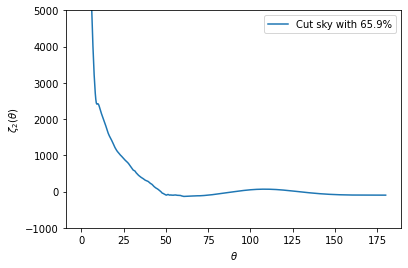

In [134]:
# Plol the results
plt.plot(r_3, corr_3[:,0], label = 'Cut sky with 65.9%')
plt.ylabel(r'$\zeta_{2}(\theta)$')
plt.xlabel(r'$\theta$')
plt.ylim(-1000,5000)
plt.legend(loc='best')

$ \textbf{$\zeta(\theta)$ to the map with mask with cut sky with 77.8%}$

In [136]:
# An NmtField object contains all the information describing the fields to correlate, including their observed maps, masks and contaminant templates.
f_4=nmt.NmtField(mask5, [planck_IQU_SMICA])

In [137]:
# Initialize binning scheme with 4 ells per bandpower
# Convenience constructor for HEALPix maps with linear binning.
b4 = nmt.NmtBin.from_nside_linear(nside, 4)

In [138]:
# Compute MASTER estimator
# spin-0 x spin-0
#Computes the full MASTER estimate of the power spectrum of two fields (f1 and f2). 
cl_40 = nmt.compute_full_master(f_4, f_4, b4)

In [139]:
#Returns an array with the effective multipole associated to each bandpower. 
#These are computed as a weighted average of the multipoles within each bandpower.
el_4 = b4.get_effective_ells()

(0.0, 2500.0)

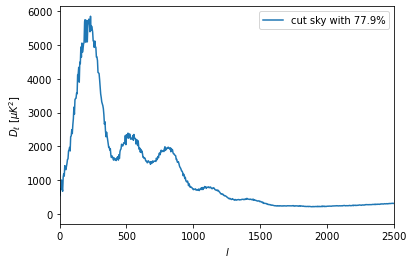

In [140]:
# The  pseudo Dls
dl_4=cl_40[0]*[(1e6)**(2)]*el_4*(el_4+1)/2/np.pi
# Plotting the results
plt.plot(el_4,dl_4, label='cut sky with 77.9%')
plt.legend()
plt.xlabel(r'$l$')
plt.ylabel('$D_\ell~[\mu K^2]$')
plt.xlim(0,2500)

In [141]:
# Interpolation of the pseudo Dls
# I define the interpolation with x**3
f_4=interp1d(el_4, dl_4, kind='cubic') 

In [142]:
# I define my news l
lnew_4=np.linspace(4, 2500, 2498)
# oncatenate

#pdl is the interpolation of the pseudo Dls
pdl_int4=f_4(lnew_4)
lnew_4.shape

(2498,)

In [143]:
# Concatenate the ls
ljoin_4=np.concatenate((([0,0,2,3]),lnew_4))
# Concatenate the  interpolated pseudo Dls
pDl_4=np.concatenate((([0.0,0.0,203.36331868506028,918.9783866182479]),pdl_int4))

In [144]:
# Make an array to input in the camb correlation function
Dl4=np.ones((len(pDl_4),4))
Dl4[:,0]=pDl_4
Dl4.shape

(2502, 4)

In [145]:
corr_4, xvals_4, weights = correlations.gauss_legendre_correlation(Dl4) 
xvals_4=np.linspace(-1,1,2502)
r_4=np.arccos(xvals_4)*180/np.pi # sampled theta values in degrees

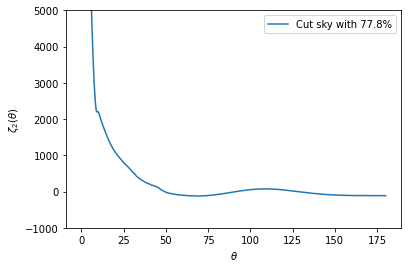

In [146]:
# Plol the results
plt.plot(r_4, corr_4[:,0], label = 'Cut sky with 77.8%')
plt.ylabel(r'$\zeta_{2}(\theta)$')
plt.xlabel(r'$\theta$')
plt.ylim(-1000,5000)
plt.legend(loc='best')

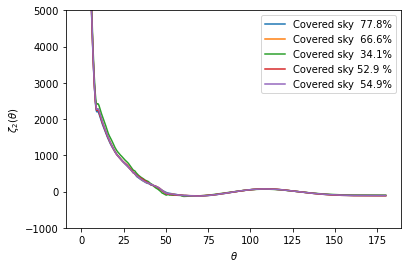

In [147]:
# Plotting all together
plt.plot(r_4, corr_4[:,0], label = 'Covered sky  77.8%')
plt.plot(r_2, corr_2[:,0], label = 'Covered sky  66.6%')
plt.plot(r_3, corr_3[:,0], label = 'Covered sky  34.1%')
plt.plot(r_, corr_[:,0], label = 'Covered sky 52.9 %')
plt.plot(r_1, corr_1[:,0], label = 'Covered sky  54.9%')
plt.ylabel(r'$\zeta_{2}(\theta)$')
plt.xlabel(r'$\theta$')
plt.ylim(-1000,5000)
plt.legend(loc='best')